# **Car Recognition Model**

In [1]:

import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

def Load_Data(TRAIN_DIR,TEST_DIR,CATEGORIES):

    file_list = []
    class_list = []

    
    # The size of the images that your neural network will use
    IMG_SIZE = 200

    # Checking or all images in the data folder
    for category in CATEGORIES :
        path = os.path.join(TRAIN_DIR, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

    training_data = []

    def create_training_data():
        for category in CATEGORIES :
            path = os.path.join(TRAIN_DIR, category)
            class_num = CATEGORIES.index(category)
            for img in os.listdir(path):
                try :
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    training_data.append([new_array, class_num])
                except Exception as e:
                    pass

    create_training_data()

    random.shuffle(training_data)

    X = [] #features
    y = [] #labels

    for features, label in training_data:
        X.append(features)
        y.append(label)

    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    # Creating the files containing all the information about your model
    pickle_out = open("X.pickle", "wb")
    pickle.dump(X, pickle_out)
    pickle_out.close()

    pickle_out = open("y.pickle", "wb")
    pickle.dump(y, pickle_out)
    pickle_out.close()

    pickle_in = open("X.pickle", "rb")
    X = pickle.load(pickle_in)
    return TRAIN_DIR,TEST_DIR,CATEGORIES
#TRAIN_DIR = "../input/damaged-cars-data/train"
#TEST_DIR="../input/damaged-cars-data/test"
# All the categories you want your neural network to detect

#CATEGORIES=["bumper","head light","window"]
TRAIN_DIR,TEST_DIR,CATEGORIES=Load_Data("../input/testttttt/Cars_Recognition/cars/Train","../input/testttttt/Cars_Recognition/cars/Test",["Honda civic", "Toyota corolla", "Suzuki Wagon R", "Mehran"])

In [2]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

def Transfer_learning(CLASSES): 

    #CLASSES = 3

    # setup model
    base_model = InceptionV3(weights='imagenet', include_top=False)

    x = base_model.output
    x = GlobalAveragePooling2D(name='avg_pool')(x)
    x = Dropout(0.4)(x)
    predictions = Dense(CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # transfer learning
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model=Transfer_learning(4)

87916544/87910968 [==============================] - 1s 0us/step


In [7]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 200
HEIGHT = 200
BATCH_SIZE = 12

def Data_Augmenter():
# data prep
    train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

    validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
    validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')
    return train_generator,validation_generator

train_generator,validation_generator=Data_Augmenter()

Found 382 images belonging to 4 classes.
Found 73 images belonging to 4 classes.


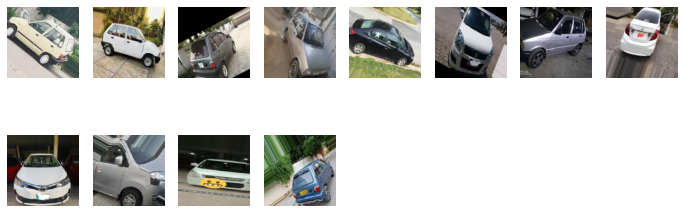

In [8]:
def Display_Augmented_Data():
    x_batch, y_batch = next(train_generator)

    plt.figure(figsize=(12, 9))
    for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
        plt.subplot(4, 8, k+1)
        plt.imshow((img + 1) / 2)
        plt.axis('off')

Display_Augmented_Data()

In [10]:
EPOCHS = 20
BATCH_SIZE = 12
STEPS_PER_EPOCH = 10
VALIDATION_STEPS = 1

MODEL_FILE = 'recognition.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Epoch 1/20
10/10 [==============================] - 2s 165ms/step - loss: 1.0240 - accuracy: 0.6667 - val_loss: 0.5502 - val_accuracy: 0.8333
Epoch 2/20
10/10 [==============================] - 2s 154ms/step - loss: 0.8205 - accuracy: 0.7000 - val_loss: 0.9972 - val_accuracy: 0.6667
Epoch 3/20
10/10 [==============================] - 2s 164ms/step - loss: 1.0134 - accuracy: 0.6610 - val_loss: 0.3977 - val_accuracy: 0.8333
Epoch 4/20
10/10 [==============================] - 1s 148ms/step - loss: 0.9226 - accuracy: 0.6583 - val_loss: 0.7750 - val_accuracy: 0.8333
Epoch 5/20
10/10 [==============================] - 2s 151ms/step - loss: 0.7885 - accuracy: 0.6917 - val_loss: 0.4342 - val_accuracy: 0.8333
Epoch 6/20
10/10 [==============================] - 2s 192ms/step - loss: 0.9099 - accuracy: 0.6500 - val_loss: 0.9666 - val_accuracy: 0.5833
Epoch 7/20
10/10 [==============================] - 2s 153ms/step - loss: 0.9936 - accuracy: 0.6186 - val_loss: 1.1787 - val_accuracy: 0.5000
Epoch 

In [ ]:
def plot_training(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("bumper","head lamp","window")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

In [6]:
model = load_model(MODEL_FILE)

NameError: name 'MODEL_FILE' is not defined

Your car is : Toyota Corolla


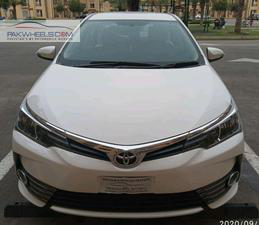

In [14]:
import PIL.Image as Image
from IPython.display import display
img = image.load_img('../input/testttttt/Cars_Recognition/cars/Test/Toyota corolla/Slide_toyota-corolla-altis-1-6-automatic-2019-41970739.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img)

if (max(preds)==preds[0]):
    car="Honda Civic"
elif(max(preds)==preds[1]):
    car="Mehran"
elif(max(preds)==preds[2]):
    car="Suzuki Wagon R"
else:
    car="Toyota Corolla"

    
print ("Your car is : "+ car)
display(Image.open("../input/testttttt/Cars_Recognition/cars/Test/Toyota corolla/Slide_toyota-corolla-altis-1-6-automatic-2019-41970739.jpg"))
